# Sentiment Analysis in Python

In this notebook, we will be doing sentiment analysis in Python using two different techniques:

1. **VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of Words Approach:**

   VADER is a sentiment analysis tool that helps determine the sentiment (positive, negative, or neutral) of a piece of text. It uses a dictionary of words and their sentiment scores to calculate the overall sentiment of a sentence.
   The Bag of Words approach means that VADER looks at individual words in the text and assigns them sentiment scores. Then, it combines these scores to determine the overall sentiment of the text.

2. **Roberta Pretrained Model from 🤗:**

   Roberta is a powerful language model developed by Hugging Face, an AI research organization. It's "pretrained" on a large amount of text data, which means it has learned patterns and structures in the language.
   In other words, it can be trained to understand the sentiment of text and classify it as positive, negative, or neutral.


# Step 0. Read in Data and NLTK Basics

NLTK is a Python library for natural language processing (NLP) tasks, such as analyzing and processing human language data. 

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computing
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For advanced data visualization
import nltk  # Natural Language Toolkit (nltk) for natural language processing tasks

# Set the plotting style to 'ggplot' for better visualizations
plt.style.use('ggplot')



In [2]:
# Read in data from the CSV file(Food Reviews Data)
# DataFrame is like a table in Excel, where data is organized in rows and columns for easy analysis and manipulation.
df = pd.read_csv(r'C:\Users\markkhawzk-i\Downloads\Reviews.csv\Reviews.csv')

# Print the shape of the original DataFrame
print("Original DataFrame shape:", df.shape)

# Select the first 500 rows of the DataFrame
df = df.head(500)

# Print the shape of the updated DataFrame
print("Updated DataFrame shape:", df.shape)


Original DataFrame shape: (568454, 10)
Updated DataFrame shape: (500, 10)


In [3]:
# Print top 5 rows of DataFrame

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Quick EDA

EDA (Exploratory Data Analysis) is a way to explore and understand data by visually and quantitatively analyzing it. It helps find patterns and insights before diving into more detailed analysis or modeling.

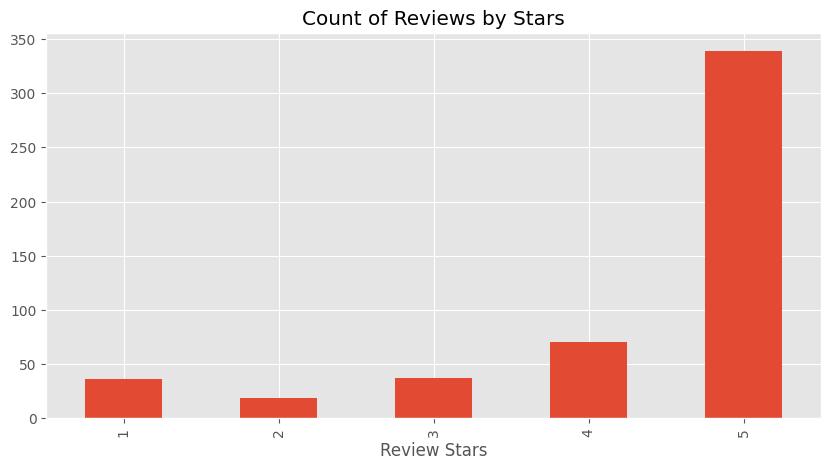

In [4]:
# Count the occurrences of each value in the 'Score' column, sort them in ascending order, and plot them as a bar chart.

# The 'value_counts()' function counts the occurrences of each unique value in the 'Score' column.
# The 'sort_index()' function sorts the counts in ascending order based on the index (review stars).
# The 'plot()' function creates a bar chart with the sorted counts.
# 'kind='bar'' specifies that we want a bar chart.
# 'title='Count of Reviews by Stars'' sets the title of the plot.
# 'figsize=(10, 5)' sets the size of the plot figure.

# Finally, 'ax.set_xlabel('Review Stars')' sets the label for the x-axis as 'Review Stars'.
# The plot is displayed using 'plt.show()'.

ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()


## Basic NLTK

In [5]:
# Extract a specific example (text) from the 'Text' column of the DataFrame, located at index 50.

example = df['Text'][50]
print(example)


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [6]:
# First-time setup: Uncomment and run these lines to download required NLTK data.
# Note: You need to run these lines only once.

# import nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('vader_lexicon')


In [7]:
# Tokenize the example text using NLTK's word_tokenize function to break it into individual words.

tokens = nltk.word_tokenize(example)

# Print the first 10 tokens (individual words) to see the result.
print(tokens[:10])


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']


In [8]:
# Perform part-of-speech tagging on the tokenized text using NLTK's pos_tag function.

tagged = nltk.pos_tag(tokens)

# Print the first 10 tagged tokens to see the result.
print(tagged[:10])

# The abbreviation can be find in this link ""https://www.guru99.com/pos-tagging-chunking-nltk.html"

[('This', 'DT'), ('oatmeal', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('good', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('mushy', 'NN'), (',', ','), ('soft', 'JJ')]


In [9]:
# # Perform named entity chunking on the tagged text using NLTK's ne_chunk function.

# entities = nltk.chunk.ne_chunk(tagged)

# # Pretty print the named entities extracted from the text.
# # Named entities carry specific meaning and significance in natural language processing tasks, and extracting them can be useful for various applications, such as information extraction, text summarization, and sentiment analysis.
# # By chunking the text and identifying these entities, we gain insights into the important elements mentioned in the text and can analyze their relationships and relevance in the context of the overall document.
# entities.pprint()


# Step 1. VADER Sentiment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

NLTK's SentimentIntensityAnalyzer is used to get neg/neu/pos scores of the text using a "bag of words" approach. It removes stop words, scores each word, and calculates the overall sentiment.

In [10]:
# Import the SentimentIntensityAnalyzer from NLTK for sentiment analysis.
# Import tqdm for a progress bar when processing data.

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Create an instance of the SentimentIntensityAnalyzer.
sia = SentimentIntensityAnalyzer()


In [11]:
# Use the SentimentIntensityAnalyzer to analyze the sentiment of the given text.

sia.polarity_scores('I am so happy!')


{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [12]:
# Use the SentimentIntensityAnalyzer to analyze the sentiment of the given text.

sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [13]:
# Use the SentimentIntensityAnalyzer to analyze the sentiment of the given text.

sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [14]:
# Run sentiment polarity scoring on the entire dataset and store the results in a dictionary.

# Create an empty dictionary to store the results.
res = {}

# Iterate through each row in the DataFrame using tqdm for a progress bar.
# 'df.iterrows()' provides both the row index (i) and the row data (row) in each iteration.
for i, row in tqdm(df.iterrows(), total=len(df)):
    # Extract the text and Id from the current row.
    text = row['Text']
    myid = row['Id']

    # Use the SentimentIntensityAnalyzer to analyze the sentiment of the text.
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/500 [00:00<?, ?it/s]

In [15]:
# Convert the results dictionary to a DataFrame and merge it with the original DataFrame.

# Create a DataFrame 'vaders' from the sentiment analysis results, transposing the data to have sentiment scores as columns.
vaders = pd.DataFrame(res).T

# Reset the index of the DataFrame and rename the column containing 'Id' values as 'Id'.
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

# Merge the 'vaders' DataFrame with the original DataFrame 'df' using 'Id' as the common key.
vaders = vaders.merge(df, how='left')


In [16]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plot VADER results

Plot the VADER sentiment analysis results to visualize the sentiment polarity of the text data.

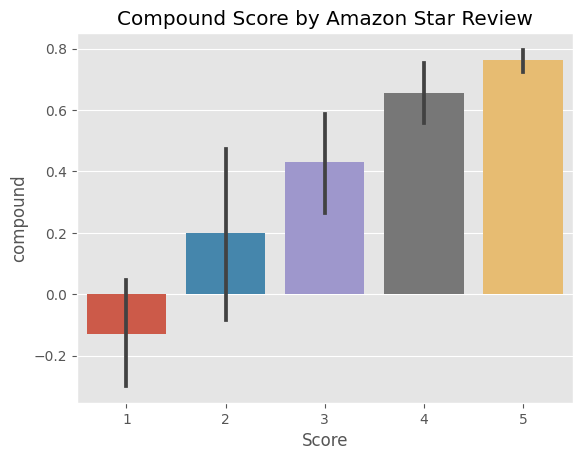

In [17]:
# Create a bar plot to show the relationship between the compound sentiment score and Amazon star ratings.

# Use Seaborn's barplot to visualize the data, where 'x' represents the Amazon star ratings ('Score') and 'y' represents the compound sentiment score.
ax = sns.barplot(data=vaders, x='Score', y='compound')

# Set the title for the plot.
ax.set_title('Compound Score by Amazon Star Review')

# Display the plot.
plt.show()


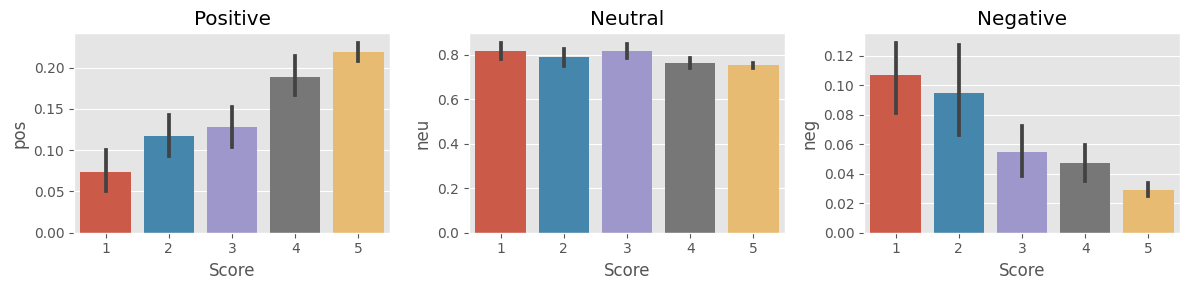

In [18]:
# Create three bar plots to show the distribution of positive, neutral, and negative sentiment scores based on Amazon star ratings.

# Set up the subplots layout with three columns in a single row.
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Plot the distribution of positive sentiment scores.
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
axs[0].set_title('Positive')

# Plot the distribution of neutral sentiment scores.
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
axs[1].set_title('Neutral')

# Plot the distribution of negative sentiment scores.
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[2].set_title('Negative')

# Adjust the layout to avoid overlapping titles and labels.
plt.tight_layout()

# Display the plots.
plt.show()


# Step 3. Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [19]:
# Import necessary libraries for using a pre-trained language model for sentiment analysis.

# Import AutoTokenizer from transformers to load the appropriate tokenizer for the language model.
from transformers import AutoTokenizer

# Import AutoModelForSequenceClassification from transformers to load the pre-trained language model.
from transformers import AutoModelForSequenceClassification

# Import softmax from scipy.special to convert raw model output into probabilities.
from scipy.special import softmax


In [20]:
# Define the pre-trained sentiment analysis model and load its tokenizer and model.

# Specify the pre-trained model to use, in this case, "cardiffnlp/twitter-roberta-base-sentiment".
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Load the tokenizer for the specified model using AutoTokenizer.from_pretrained().
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Load the pre-trained model for sequence classification using AutoModelForSequenceClassification.from_pretrained().
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [21]:
# VADER sentiment analysis on the example text.

# Print the example text.
print(example)

# Use the SentimentIntensityAnalyzer to analyze the sentiment of the example text.
sia.polarity_scores(example)


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [25]:
# Sentiment analysis using the Roberta Model.

# Encode the example text using the tokenizer.
encoded_text = tokenizer(example, return_tensors='pt')

# Run the encoded text through the pre-trained model.
output = model(**encoded_text)

# Extract the raw model output scores.
scores = output[0][0].detach().numpy()

# Convert the raw scores into probabilities using softmax.
scores = softmax(scores)

# Create a dictionary to store the sentiment probabilities for each category.
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}

# Print the sentiment probabilities.
print(scores_dict)


{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687453, 'roberta_pos': 0.0029573666}


# Step 3: Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

KeyError: 'vader_neg'

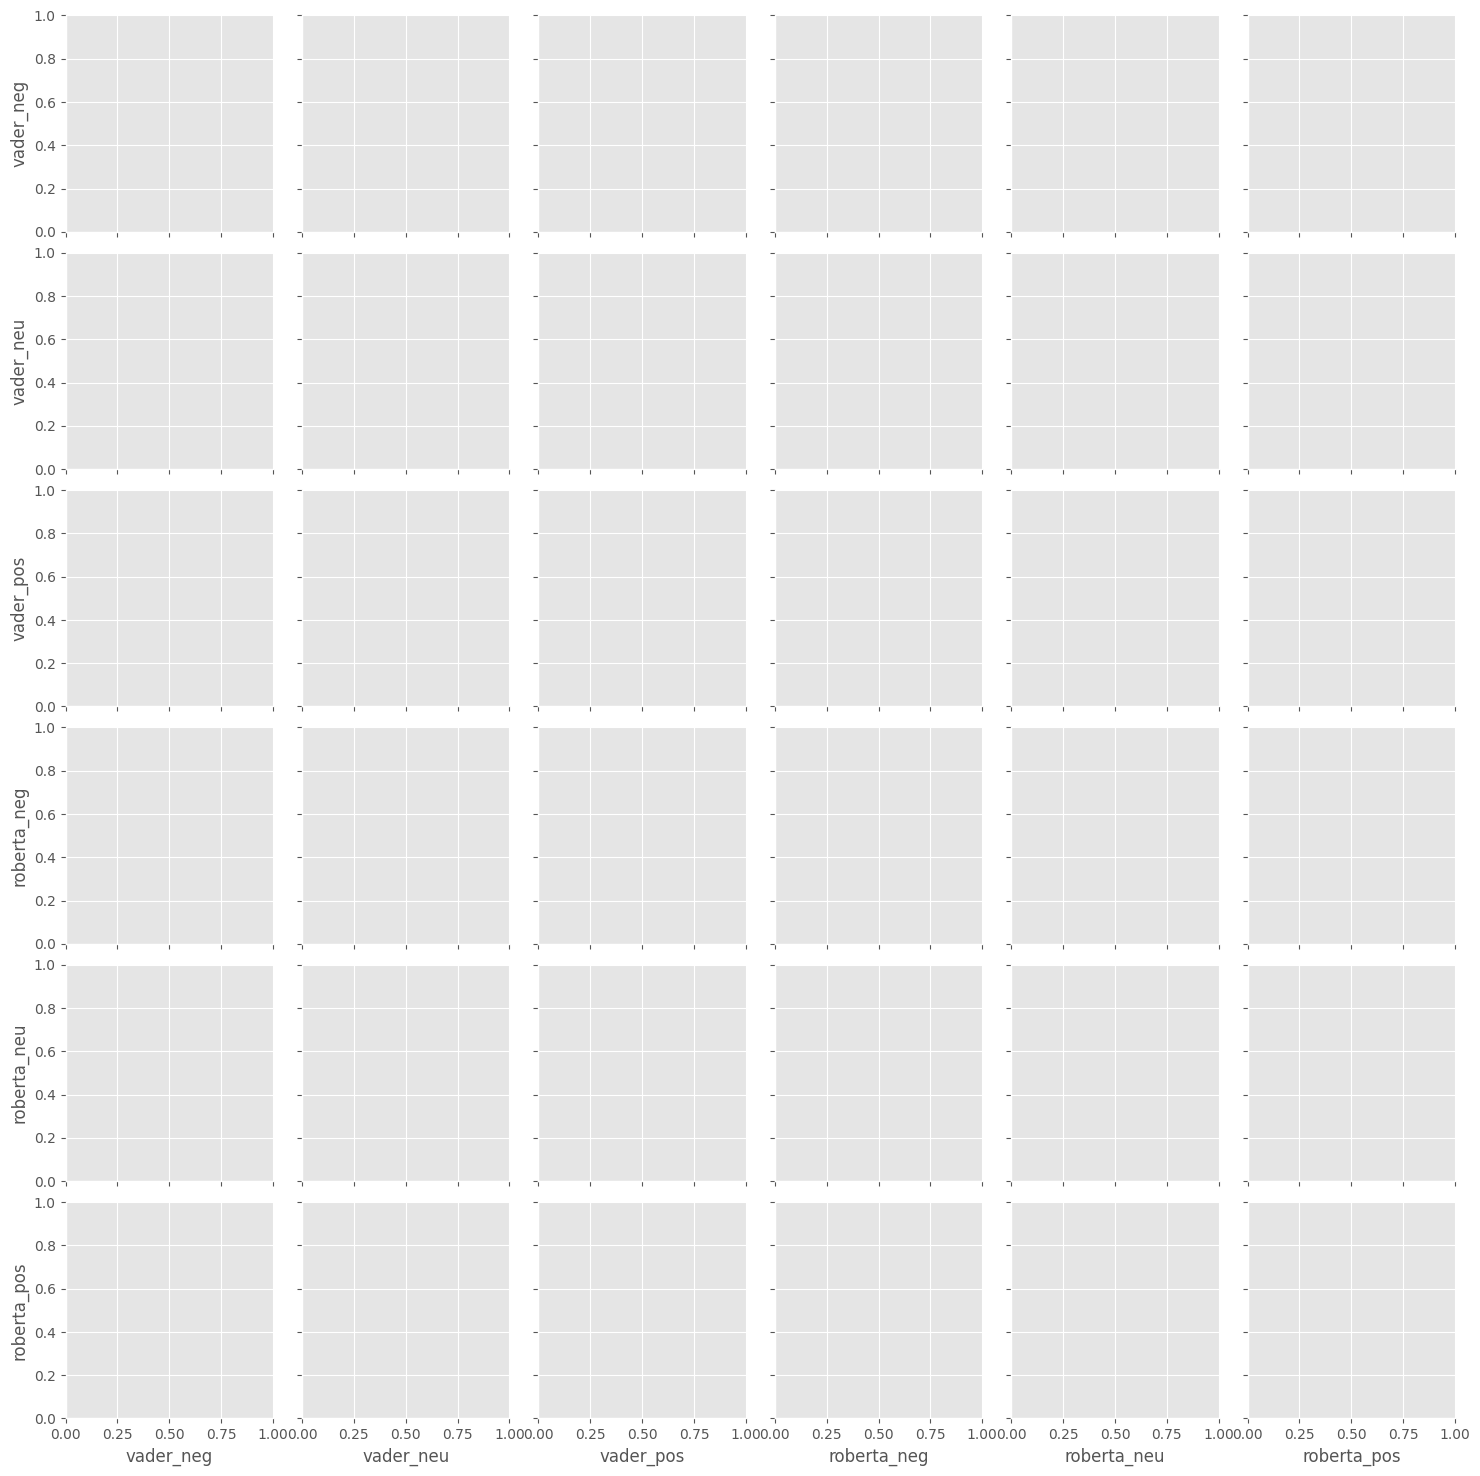

In [28]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')

# Calculate the average sentiment scores for VADER and Roberta for each Amazon star rating.
average_vader_scores = results_df.groupby('Score')[['vader_neg', 'vader_neu', 'vader_pos']].mean()
average_roberta_scores = results_df.groupby('Score')[['roberta_neg', 'roberta_neu', 'roberta_pos']].mean()

# Plot the average sentiment scores for each model using a bar plot.
plt.figure(figsize=(10, 5))
bar_width = 0.35
x = np.arange(len(average_vader_scores.index))

plt.bar(x - bar_width/2, average_vader_scores['vader_neg'], bar_width, label='VADER Negative', color='red')
plt.bar(x - bar_width/2, average_vader_scores['vader_neu'], bar_width, bottom=average_vader_scores['vader_neg'], label='VADER Neutral', color='yellow')
plt.bar(x - bar_width/2, average_vader_scores['vader_pos'], bar_width, bottom=average_vader_scores['vader_neg'] + average_vader_scores['vader_neu'], label='VADER Positive', color='green')

plt.bar(x + bar_width/2, average_roberta_scores['roberta_neg'], bar_width, label='Roberta Negative', color='blue')
plt.bar(x + bar_width/2, average_roberta_scores['roberta_neu'], bar_width, bottom=average_roberta_scores['roberta_neg'], label='Roberta Neutral', color='cyan')
plt.bar(x + bar_width/2, average_roberta_scores['roberta_pos'], bar_width, bottom=average_roberta_scores['roberta_neg'] + average_roberta_scores['roberta_neu'], label='Roberta Positive', color='purple')

plt.xlabel('Amazon Star Rating')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Scores by Amazon Star Rating and Model')
plt.xticks(x, average_vader_scores.index)
plt.legend()
plt.show()

# Thanks